Import statements

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

#   Scikit Learn --
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
#Importing a package for Using Ridge and Lasso Analysis
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
# Splitting the Data Set into two Folds: Training and Testing using train_test_split()
from sklearn.cross_validation import train_test_split
# Tool for calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

#  Packages for Visualization --
import seaborn as sns
# Plotly
from plotly.offline import plot  
import plotly.plotly as py
import plotly.graph_objs as go
# Scatter Plot
from pandas.tools.plotting import scatter_matrix

In [20]:
#loading data
kepler = pd.read_csv('Ex01_Kepler_Regression.csv')
kepler

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,OrbitalPeriod
0,0.662104,10.236030,10.892849,6.072644,Venus,0.448359
1,11.721498,8.132345,34.080931,0.758931,Saturn,40.447949
2,4.903094,1.538470,58.493158,1.281688,Jupiter,10.063035
3,0.817968,8.532505,10.034185,6.129132,Venus,0.551544
4,27.016293,7.106079,25.796580,2.108022,Neptune,225.690334
5,24.645875,5.467985,24.884934,1.920847,Neptune,112.866058
6,0.697118,10.022764,10.050127,4.778389,Venus,0.500145
7,21.010415,7.157667,20.691601,1.347757,Uranus,179.595311
8,1.703412,1.676122,5.537115,4.229687,Mars,2.718085
9,6.130358,1.530082,58.528652,1.346489,Jupiter,16.136843


In [21]:
#correlation matrix
correlation_matrix = kepler.corr()
correlation_matrix

,SemiMajorAxis,Volume,EscapeVelocity,Density,OrbitalPeriod
SemiMajorAxis,1.000000,0.278926,0.323329,-0.716234,0.918149
Volume,0.278926,1.000000,-0.015625,-0.153851,0.229391
EscapeVelocity,0.323329,-0.015625,1.000000,-0.687354,0.225476
Density,-0.716234,-0.153851,-0.687354,1.000000,-0.565611
OrbitalPeriod,0.918149,0.229391,0.225476,-0.565611,1.000000


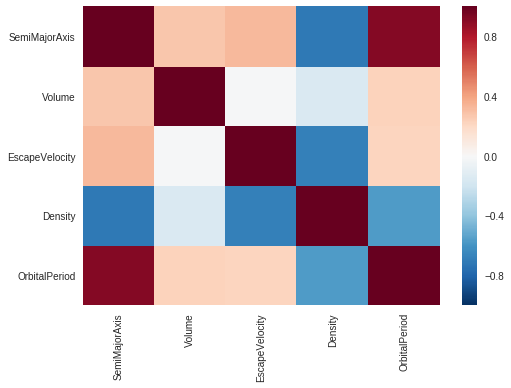

In [22]:
#heat map
correlation_plot = sns.heatmap(correlation_matrix,
            xticklabels = correlation_matrix.columns.values,
            yticklabels = correlation_matrix.columns.values)
for label in correlation_plot.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.figure(figsize=(12,12))
plt.show()


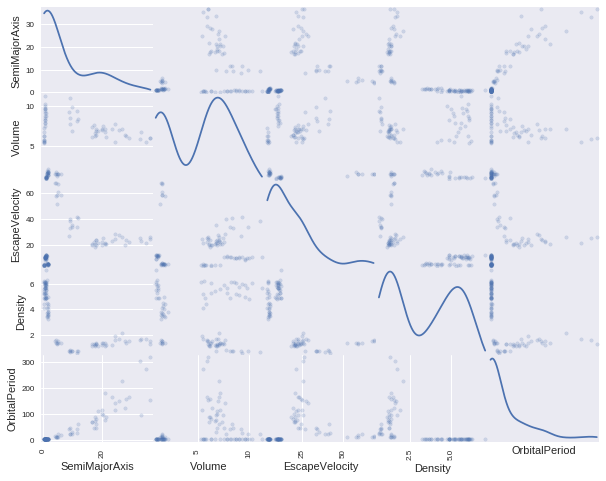

In [23]:
#scatter matrix
scatter_matrix(kepler, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.xticks(())
plt.yticks(())
plt.show()

In [24]:
#finding rmse using all features
X = kepler.drop(['OrbitalPeriod','planet'], axis=1)
Y = kepler.OrbitalPeriod
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4, train_size=.80, test_size=.20)
Linear_Model = LinearRegression()
# Computing RMSE Score :-
Score = cross_val_score(Linear_Model, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
RMSE_Score.mean()
print("ALL FEATURES - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into Linear Regression Model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

ALL FEATURES - 

RMSE Score Mean =  25.9456658951
Intercept =  -46.4618313725
Coefficeints =  [ 7.23062079 -1.16686158  0.18175063  8.63835196]
Accuracy =  0.888101908045


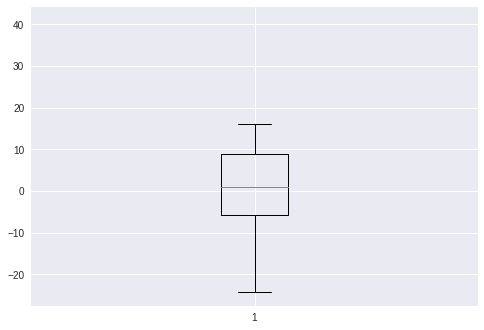

In [25]:
#box plot
Residuals_allFeatures = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_allFeatures)
plt.show()

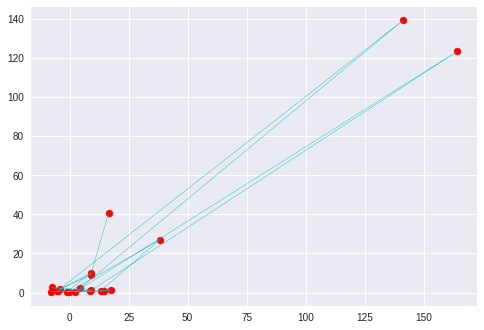

In [26]:
#scatter plot
regr2 = Linear_Model
regr2.fit(X_train, Y_train)
plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

In [27]:
#ols method
model_all = sm.ols(formula="OrbitalPeriod ~ SemiMajorAxis + Volume + EscapeVelocity + Density", data = kepler[0:80]).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OrbitalPeriod   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           8.47e-31
Time:                        01:33:53   Log-Likelihood:                -372.21
No. Observations:                  80   AIC:                             754.4
Df Residuals:                      75   BIC:                             766.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -36.1402     17.786     -2.032      0.046     -71.572      -0.708
SemiMajorAxis      6.6706      0.430     15.500      0.000       5.813       7.528
Volume            -0.6238      0.967     -0.645      0.521      -2.551       1.303
EscapeVelocity     0.0629      0.273      0.230      0.818      -0.481       0.607
Density            6.2383      2.790      2.236      0.028       0.680      11.797
==============================================================================
Omnibus:                       24.175   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.559
Skew:                           0.508   Prob(JB):                     7.45e-34
Kurtosis:                       9.689   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#finding rmse excluding semi major axis
X_without_semimajor = kepler.drop(['SemiMajorAxis','planet'], axis=1)

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X_without_semimajor, Y, random_state=4, train_size=.80, test_size=.20)
# Computing RMSE Score :-
Score = cross_val_score(Linear_Model, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
print("SELECTED FEATURES (without semi major axis) - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into the model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

SELECTED FEATURES (without semi major axis) - 

RMSE Score Mean =  5.7151175565e-14
Intercept =  8.52651282912e-14
Coefficeints =  [  1.63696323e-15  -4.44089210e-16  -1.78815296e-14   1.00000000e+00]
Accuracy =  1.0


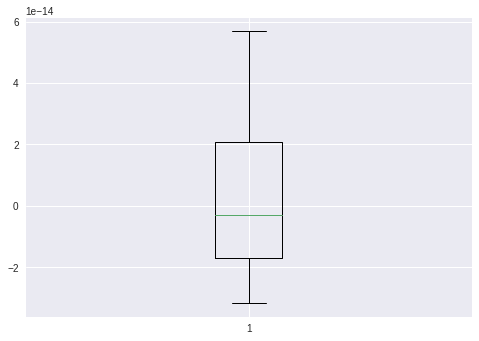

In [29]:
#box plot
Residuals_without_semi_major_axis = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_without_semi_major_axis)
plt.show()

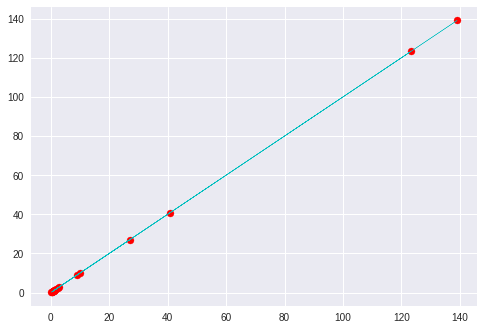

In [30]:
#scatter plot
regr2 = Linear_Model
regr2.fit(X_train, Y_train)
plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

In [31]:
#ols
model_without_semi_major = sm.ols(formula="OrbitalPeriod ~ Volume + EscapeVelocity + Density", data = kepler[0:80]).fit()
model_without_semi_major.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OrbitalPeriod   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     16.60
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           2.17e-08
Time:                        01:33:55   Log-Likelihood:                -429.64
No. Observations:                  80   AIC:                             867.3
Df Residuals:                      76   BIC:                             876.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        144.5767     27.356      5.285      0.000      90.093     199.060
Volume             1.5827      1.949      0.812      0.419      -2.298       5.464
EscapeVelocity    -1.4036      0.521     -2.692      0.009      -2.442      -0.365
Density          -24.8102      3.956     -6.271      0.000     -32.690     -16.931
==============================================================================
Omnibus:                       51.135   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.095
Skew:                           2.083   Prob(JB):                     7.81e-40
Kurtosis:                       9.056   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#finding rmse using only semi major axis as feature
X_with_semimajor = kepler.drop(['Volume','EscapeVelocity','Density','planet'], axis=1)

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X_with_semimajor, Y, random_state=4, train_size=.80, test_size=.20)
Score = cross_val_score(Linear_Model, X_train, Y_train, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
print("SELECTED FEATURES (with semi major axis) - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into the model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

SELECTED FEATURES (with semi major axis) - 

RMSE Score Mean =  1.92436553875e-14
Intercept =  -1.42108547152e-14
Coefficeints =  [  1.89851989e-15   1.00000000e+00]
Accuracy =  1.0


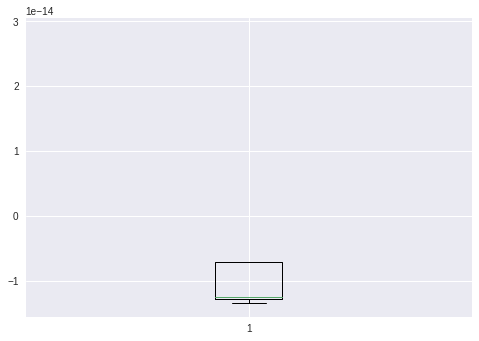

In [33]:
#boxplot
Residuals_semi_major = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_semi_major)
plt.show()

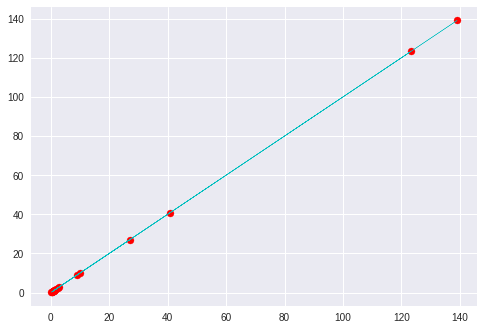

In [34]:
#scatter plot
regr2 = Linear_Model
regr2.fit(X_train, Y_train)
plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

In [35]:
#ols
model_with_semi_major = sm.ols(formula="OrbitalPeriod ~ SemiMajorAxis", data = kepler[0:80]).fit()
model_with_semi_major.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OrbitalPeriod   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     407.9
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           1.02e-32
Time:                        01:33:57   Log-Likelihood:                -376.63
No. Observations:                  80   AIC:                             757.3
Df Residuals:                      78   BIC:                             762.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.4309      3.995     -2.361      0.021     -17.385      -1.477
SemiMajorAxis     5.7676      0.286     20.196      0.000       5.199       6.336
==============================================================================
Omnibus:                       32.642   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.607
Skew:                           1.092   Prob(JB):                     2.93e-31
Kurtosis:                       9.117   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference:  By choosing different features and calculating rmse,we get least rmse value when we select only semiMajorAxis and also the plot between predicted and obseved is linear(y=x).We can apply log on both sides of this model and check whether linear relation exists for log(orbital period) and log(semiMajorAxis)



model which considers log(orbital period) and log(semiMajorAxis)

In [38]:
#ols for log(orbital period) and log(semiMajorAxis)
model_log = sm.ols(formula= "np.log(OrbitalPeriod) ~ np.log(SemiMajorAxis)", data = kepler[:80]).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(OrbitalPeriod)   R-squared:                       0.985
Model:                               OLS   Adj. R-squared:                  0.985
Method:                    Least Squares   F-statistic:                     5023.
Date:                   Mon, 03 Apr 2017   Prob (F-statistic):           1.42e-72
Time:                           01:35:25   Log-Likelihood:                -13.910
No. Observations:                     80   AIC:                             31.82
Df Residuals:                         78   BIC:                             36.58
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0186      0.042      0.447      0.656      -0.064       0.101
np.log(SemiMajorAxis)     1.4993      0.021     70.870      0.000       1.457       1.541
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.607
Skew:                           0.064   Prob(JB):                        0.738
Kurtosis:                       2.593   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#finding rmse for this
x_train = np.log(X_train)
y_train = np.log(Y_train)
x_test = np.log(X_test)
y_test = np.log(Y_test)

Score = cross_val_score(Linear_Model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
MSE_Score = -Score
RMSE_Score = np.sqrt(MSE_Score)
print("SELECTED FEATURES (with semi major axis) - \n\nRMSE Score Mean = ", RMSE_Score.mean())

# Training Data into the model
Linear_Model.fit(X_train, Y_train)

# Intercept
print("Intercept = ", Linear_Model.intercept_)

# Coeffecients Obtained
print("Coefficeints = ", Linear_Model.coef_)

# Accuracy
Accuracy = Linear_Model.score(X_test, Y_test)
print("Accuracy = ", Accuracy)

SELECTED FEATURES (with semi major axis) - 

RMSE Score Mean =  5.94867359926e-16
Intercept =  -1.42108547152e-14
Coefficeints =  [  1.89851989e-15   1.00000000e+00]
Accuracy =  1.0


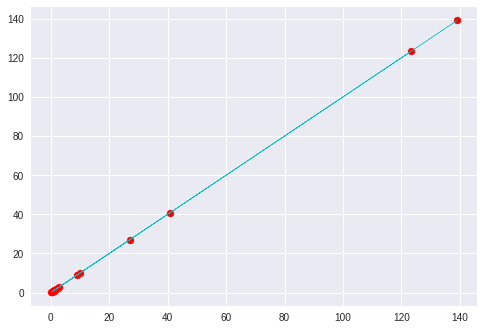

In [40]:
#scatter plot
regr2 = Linear_Model
regr2.fit(x_train, y_train)
plt.scatter(Linear_Model.predict(X_test),Y_test, color='r')
plt.plot(Linear_Model.predict(X_test),Y_test, color='c',linewidth=0.4)
plt.show()

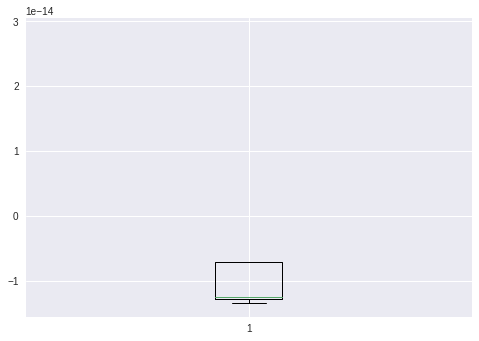

In [41]:
#boxplot
Residuals_semi_major_log = np.array(Linear_Model.predict(x_test) - y_test)
plt.boxplot(Residuals_semi_major)
plt.show()

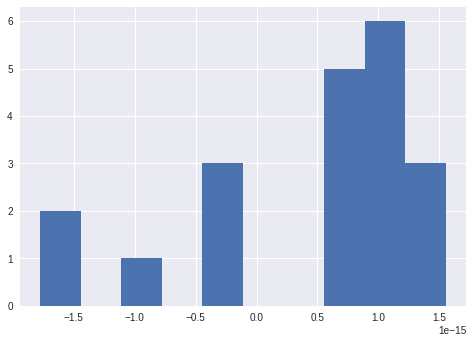

In [42]:
#histogram
plt.hist(Residuals_semi_major_log, bins=10)
plt.show()

In [43]:
#p value for hypothesis testing
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_log.resid, model_log.model.exog)
list(zip(name,test))

[('F statistics', 0.82795920453327654), ('p_value', 0.71825091897191184)]

Ridge regression

In [44]:
alphas = 10**np.linspace(10,-2,100)*0.5

Ridge regression1

In [45]:
ridge = Ridge(normalize=True)

coefs = [] 

# Fitting X and Y for each value of alpha using a loop statment
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

Preparing a dataframe

In [46]:
coefs_df = pd.DataFrame(coefs, columns=X.columns.values) 
coefs_df['Alpha'] = pd.DataFrame(alphas)

coefs_df.head()

,SemiMajorAxis,Volume,EscapeVelocity,Density,Alpha
0,1.191606e-09,9.960673e-10,1.941957e-10,-3.775194e-09,5.000000e+09
1,1.575233e-09,1.316742e-09,2.567153e-10,-4.990584e-09,3.782317e+09
2,2.082365e-09,1.740656e-09,3.393626e-10,-6.597259e-09,2.861184e+09
3,2.752764e-09,2.301045e-09,4.486173e-10,-8.721188e-09,2.164381e+09
4,3.638992e-09,3.041846e-09,5.930457e-10,-1.152890e-08,1.637275e+09


Plot for ridge regression

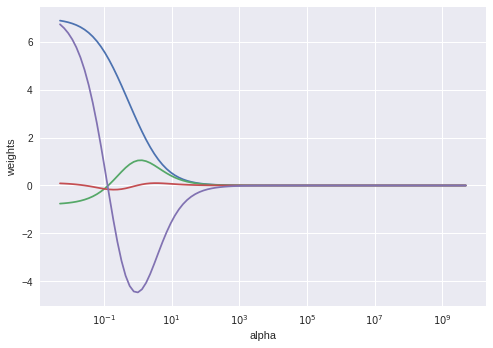

In [47]:
# Plotting Graphs -
ax = plt.gca()  # to get the instance of plot
ax.plot(alphas, coefs)
ax.set_xscale('log')   # need on log scale because of huge variation in alpha
plt.axis('tight')      # Just holds the position of 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

Using cross-validation for ridge regression

In [48]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.5, random_state=1)

Ridge regression2

In [49]:
# Fitting into Ridge Model using specific value of alpha = 10
ridge2 = Ridge(alpha=10, normalize=True)
ridge2.fit(X_train, Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [50]:
# Getting Predictions for Ridge(Test) as compared with the Ridge(Training)
pred2 = ridge2.predict(X_test)

print(pd.Series(ridge2.coef_, index=X.columns))
print(mean_squared_error(Y_test, pred2))

SemiMajorAxis     0.514016
Volume            0.565223
EscapeVelocity    0.123257
Density          -1.892942
dtype: float64
3418.73036051


Ridge Regression3

In [51]:
# Fiting the data in a Cross_Val Ridge Model to get the perfect alpha value for a ideal model
ridge_cv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridge_cv.fit(X_train, Y_train)
# Deducted perfect value of alpha for best ridge model
ridge_cv.alpha_

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error

0.015269277544167062

In [52]:
ridge3 = Ridge(alpha=ridge_cv.alpha_, normalize=True)
ridge3.fit(X_train, Y_train)

Ridge(alpha=0.015269277544167062, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [53]:
pred3 = ridge3.predict(X_test)

print(pd.Series(ridge3.coef_, index=X.columns))
print(mean_squared_error(Y_test, pred3))
coefs_df.columns

SemiMajorAxis     6.540596
Volume           -0.064365
EscapeVelocity   -0.024330
Density           3.887769
dtype: float64
590.787722841


Index(['SemiMajorAxis', 'Volume', 'EscapeVelocity', 'Density', 'Alpha'], dtype='object')

Plotly

In [54]:
# Traces
trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.SemiMajorAxis,
    name = 'SemiMajorAxis',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Volume,
    name = 'volume',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.EscapeVelocity,
    name = 'EscapeVelocity',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Density,
    name = 'Density',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
data1 = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )
fig = dict(data=data1, layout=layout)
plot(fig)

'file:///home/user/ml_assgn/temp-plot.html'

Lasso Regression

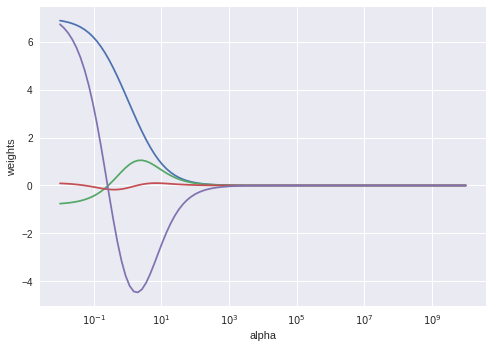

In [55]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs_lasso = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coefs_lasso.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')   
plt.show()



In [56]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

597.70225947289862

In [57]:
coefs_lasso_df = pd.DataFrame(coefs_lasso, columns=X.columns.values) 
coefs_lasso_df['Alpha'] = pd.DataFrame(alphas)

In [58]:
# Traces
trace0 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.SemiMajorAxis,
    name = 'SemiMajorAxis',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Volume,
    name = 'volume',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.EscapeVelocity,
    name = 'EscapeVelocity',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Density,
    name = 'Density',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
data1 = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )
fig = dict(data=data1, layout=layout)
plot(fig)

'file:///home/user/ml_assgn/temp-plot.html'

In [59]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train,Y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train,Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

lasso.fit(X_train,Y_train)
pd.Series(lasso.coef_, index=X.columns)

SemiMajorAxis     6.541104
Volume           -0.000000
EscapeVelocity   -0.000000
Density           3.751254
dtype: float64

conclusion: we can say that model of log(orbital period) and log(semiMajorAxis) is good with less rmse so they confirm to Kepler’s Third Law of Planetary Motion